In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.utils import to_categorical

In [4]:
import tensorflow as tf
print(tf.__version__)

2.18.1


In [6]:
feature_vector_length = 784 
num_classes = 10 
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() 
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

Feature shape: (784,)


In [8]:
X_train = X_train.reshape(X_train.shape[0], feature_vector_length) 
X_test = X_test.reshape(X_test.shape[0], feature_vector_length) 
X_train = X_train.astype('float32') / 255 
X_test = X_test.astype('float32') / 255 
Y_train = to_categorical(Y_train, num_classes) 
Y_test = to_categorical(Y_test, num_classes) 

In [12]:
model = Sequential() 
model.add(Dense(350, input_shape=input_shape, activation='relu')) 
model.add(Dense(50, activation='relu')) 
model.add(Dense(num_classes, activation='softmax')) 

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.fit(X_train, Y_train, epochs=5, batch_size=250, verbose=1, validation_split=0.2)

Epoch 1/5
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8918 - loss: 0.3911 - val_accuracy: 0.9514 - val_loss: 0.1781
Epoch 2/5
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9558 - loss: 0.1521 - val_accuracy: 0.9663 - val_loss: 0.1237
Epoch 3/5
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9702 - loss: 0.1020 - val_accuracy: 0.9681 - val_loss: 0.1106
Epoch 4/5
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9786 - loss: 0.0728 - val_accuracy: 0.9733 - val_loss: 0.0922
Epoch 5/5
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9840 - loss: 0.0552 - val_accuracy: 0.9728 - val_loss: 0.0912


In [16]:
test_results = model.evaluate(X_test, Y_test, verbose=1) 
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}') 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9742 - loss: 0.0828
Test results - Loss: 0.08279753476381302 - Accuracy: 0.9742000102996826


In [18]:
predictions = model.predict(X_test[:10]) 
predicted_classes = np.argmax(predictions, axis=1) 
true_classes = np.argmax(Y_test[:10], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


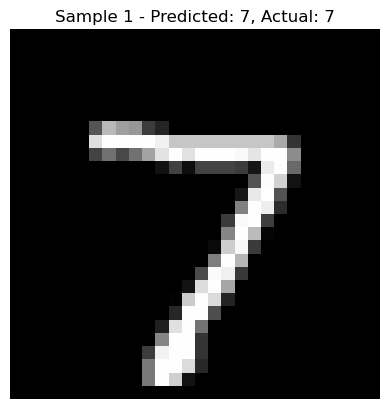

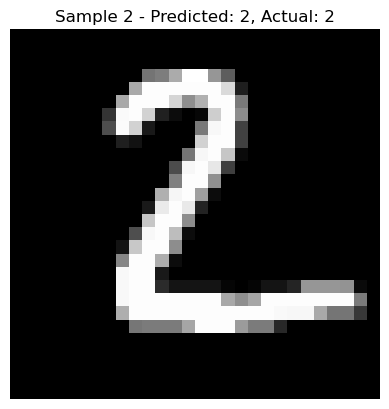

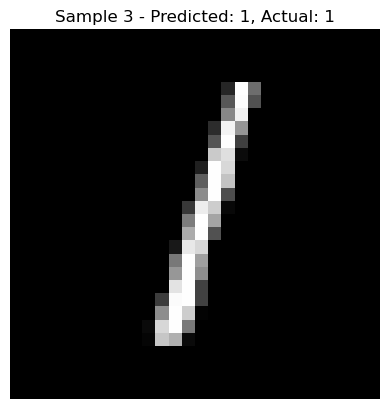

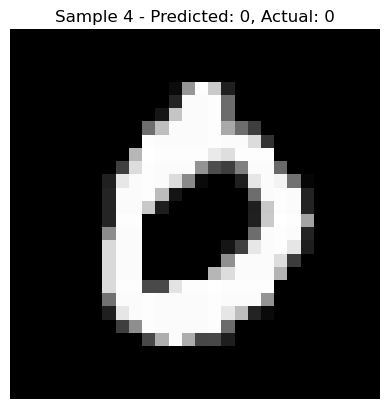

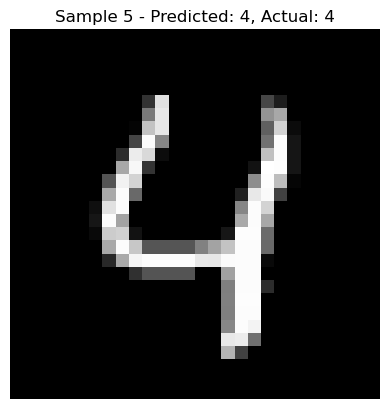

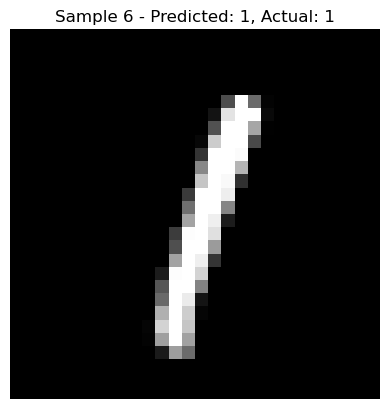

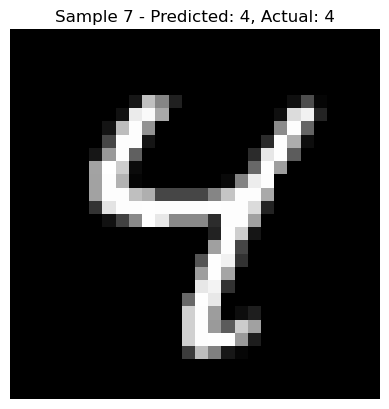

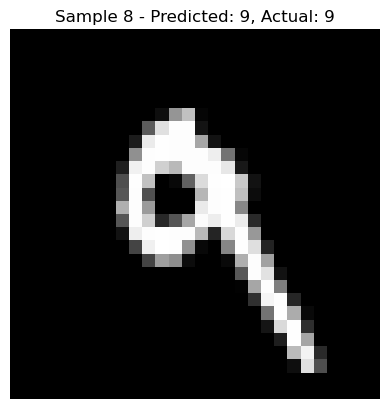

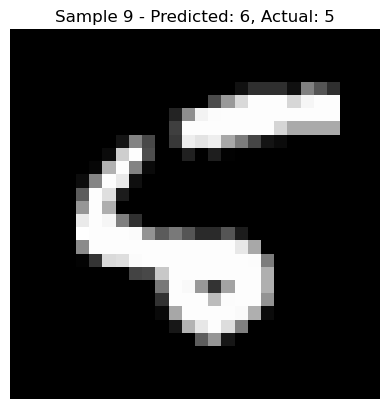

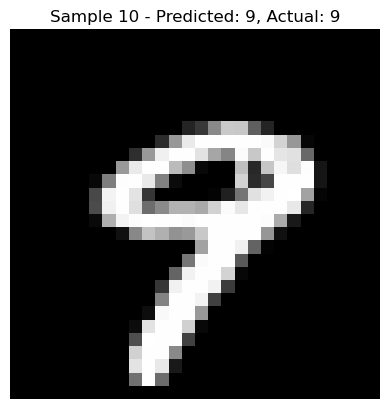

In [20]:
for i in range(10): 
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray') 
    plt.title(f"Sample {i+1} - Predicted: {predicted_classes[i]}, Actual: {true_classes[i]}") 
    plt.axis('off') 
    plt.show()